In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from fastcore.xtras import load_pickle
from scipy.stats import sem
import pandas as pd 

from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

In [3]:
results = glob("results_anthropic/*.pkl")

In [4]:
gpr_results = pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/xgboost_results.pkl')
gpt_results = pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/results.pkl')

In [5]:
loaded_res = []

for result in results:
    r = load_pickle(result)

    res = r['metrics']
    res['train_size'] = r['train_size']
    res['temperature'] = r['temperature']
    res['num_classes'] = r['num_classes']
    res['representation'] = r['representation']
    res['temperature'] = r['temperature']
    loaded_res.append(res)

In [6]:
loaded_res

[{'accuracy': 0.16666666666666666,
  'acc_macro': 0.6666666666666667,
  'racc': 0.19444444444444445,
  'kappa': -0.03448275862068967,
  'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
  'f1_macro': 0.09350649350649351,
  'f1_micro': 0.16666666666666666,
  'frac_valid': 1.0,
  'all_y_true': (#18) [0,1,1,1,0,0,0,0,1,1...],
  'all_y_pred': [1, 3, 3, 3, 0, 4, 2, 4, 2, 1, 4, 2, 0, 2, 1, 1, 4, 1],
  'valid_indices': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17],
  'might_have_rounded_floats': False,
  'train_size': 70,
  'temperature': 0,
  'num_classes': 2,
  'representation': 'name'},
 {'accuracy': 0.6231155778894473,
  'acc_macro': 0.8923187365398421,
  'racc': 0.4495593545617535,
  'kappa': 0.31530415634461884,
  'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1, 5, 7, 18, 34, 42]),
  'f1_macro': 0.18741001439769636,
  'f1_micro': 0.6231155778894473,
  'frac_valid': 0.995,
  'all_y_true': (#200)

In [7]:
loaded = pd.DataFrame(loaded_res)

In [8]:
grouped = loaded.groupby(['num_classes', 'representation', 'temperature', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [9]:
grouped

accuracy            \
                                                       mean       std   
num_classes representation temperature train_size                       
2           SMILES         0.0         10          0.568571  0.062163   
                                       20          0.604167  0.115560   
                                       50          0.613668  0.131469   
                                       70          0.752994  0.129464   
                           0.1         10          0.590000  0.028284   
...                                                     ...       ...   
5           selfies        1.5         20          0.147208       NaN   
                                       50          0.165803       NaN   
                           2.0         10          0.055276       NaN   
                                       20          0.065000       NaN   
                                       50          0.055000       NaN   

                                                            acc_macro  \
                                                        sem      mean   
num_classes representation temperature train_size                       
2           SMILES         0.0         10          0.023496  0.837745   
                                       20          0.047177  0.848462   
                                       50          0.058795  0.777610   
                                       70          0.052854  0.908843   
                           0.1         10          0.020000  0.873571   
...                                                     ...       ...   
5           selfies        1.5         20               NaN  0.972927   
                                       50               NaN  0.969104   
                           2.0         10               NaN  0.985239   
                                       20               NaN  0.987533   
                                       50               NaN  0.986000   

                                                                       \
                                                        std       sem   
num_classes representation temperature train_size                       
2           SMILES         0.0         10          0.028691  0.010844   
                                       20          0.120204  0.049073   
                                       50          0.211671  0.094662   
                                       70          0.081568  0.033300   
                           0.1         10          0.005051  0.003571   
...                                                     ...       ...   
5           selfies        1.5         20               NaN       NaN   
                                       50               NaN       NaN   
                           2.0         10               NaN       NaN   
                                       20               NaN       NaN   
                                       50               NaN       NaN   

                                                       racc            \
                                                       mean       std   
num_classes representation temperature train_size                       
2           SMILES         0.0         10          0.457054  0.021173   
                                       20          0.474221  0.020751   
                                       50          0.474009  0.029812   
                                       70          0.487769  0.005610   
                           0.1         10          0.464475  0.026481   
...                                                     ...       ...   
5           selfies        1.5         20          0.140380       NaN   
                                       50          0.157534       NaN   
                           2.0         10          0.057297       NaN   
                                       20          0.046325       NaN   
                                 

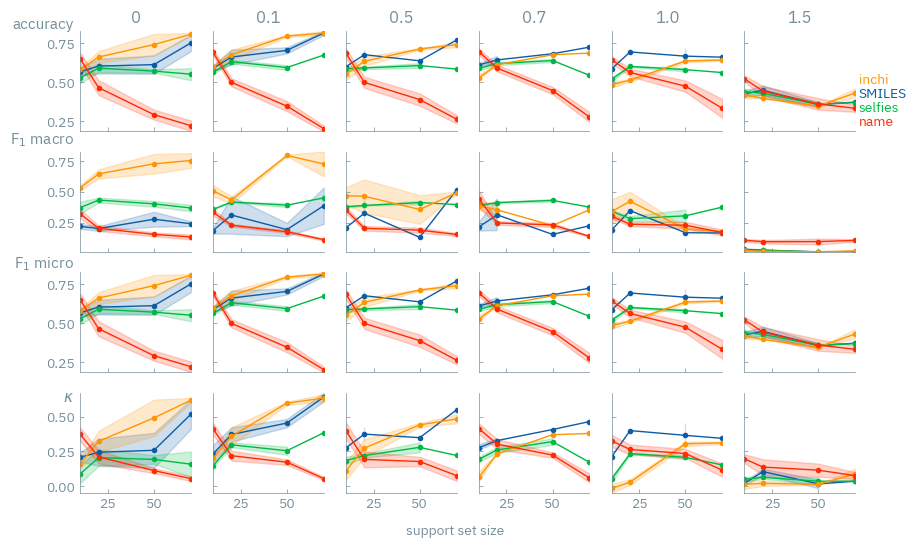

In [10]:
fig, ax = plt.subplots(4, 6, figsize=(10, 6), sharex=True, sharey='row')

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    for j, representation in enumerate(['SMILES', 'selfies', 'inchi', 'name']):
        for k, temperature in enumerate([0, 0.1, 0.5, 0.7, 1.0, 1.5]): 
            try:
                ax[i][k].plot(
                    grouped.loc[(2, representation, temperature)].index,
                    grouped.loc[(2, representation, temperature)][metric]['mean'],
                    label=f"{representation}",
                    color=f"C{j}",
                    marker='o',
                )
                ax[i][k].fill_between(
                    grouped.loc[(2, representation, temperature)].index,
                    grouped.loc[(2, representation, temperature)][metric]['mean'] - grouped.loc[(2, representation, temperature)][metric]['sem'],
                    grouped.loc[(2, representation, temperature)][metric]['mean'] + grouped.loc[(2, representation, temperature)][metric]['sem'],
                    alpha=0.2,
                    color=f"C{j}",
                )
            except KeyError as e:
                print(e)
                pass


for  k, temp in enumerate([0, 0.1, 0.5, 0.7, 1.0, 1.5]):
    ax[0][k].set_title(f"{temp}")
    
ylabel_top('accuracy', ax[0][0])
ylabel_top(r'F$_1$ macro', ax[1][0])
ylabel_top(r'F$_1$ micro', ax[2][0])
ylabel_top(r'$\kappa$', ax[3][0])

matplotx.line_labels(ax[0][-1])

fig.text(0.5, 0.04, 'support set size', ha='center')

fig.savefig('claude_few_shot.pdf', bbox_inches='tight')

In [11]:
gpt_results

frac_valid            accuracy  \
                                            mean  std  sem      mean   
num_classes representation train_size                                  
2           SMILES         10                1.0  0.0  0.0  0.663077   
                           20                1.0  0.0  0.0  0.738182   
                           50                1.0  0.0  0.0  0.809167   
                           100               1.0  0.0  0.0  0.860909   
                           200               1.0  0.0  0.0  0.872500   
            inchi          10                1.0  0.0  0.0  0.580000   
                           20                1.0  0.0  0.0  0.790000   
                           50                1.0  0.0  0.0  0.817273   
                           100               1.0  0.0  0.0  0.835455   
                           200               1.0  0.0  0.0  0.856364   
            name           10                1.0  0.0  0.0  0.749663   
                           20                1.0  0.0  0.0  0.837010   
                           50                1.0  0.0  0.0  0.858726   
            selfies        10                1.0  0.0  0.0  0.590769   
                           20                1.0  0.0  0.0  0.700000   
                           50                1.0  0.0  0.0  0.766000   
                           100               1.0  0.0  0.0  0.831818   
                           200               1.0  0.0  0.0  0.847000   
5           SMILES         10                1.0  0.0  0.0  0.243000   
                           20                1.0  0.0  0.0  0.305556   
                           50                1.0  0.0  0.0  0.482222   
                           100               1.0  0.0  0.0  0.546250   
                           200               1.0  0.0  0.0  0.594444   
            inchi          10                1.0  0.0  0.0  0.320909   
                           20                1.0  0.0  0.0  0.410000   
                           50                1.0  0.0  0.0  0.464444   
                           100               1.0  0.0  0.0  0.522500   
                           200               1.0  0.0  0.0  0.584444   
            name           10                1.0  0.0  0.0  0.338608   
                           20                1.0  0.0  0.0  0.431373   
                           50                1.0  0.0  0.0  0.470395   
            selfies        10                1.0  0.0  0.0  0.260000   
                           20                1.0  0.0  0.0  0.331250   
                           50                1.0  0.0  0.0  0.445000   
                           100               1.0  0.0  0.0  0.510000   
                           200               1.0  0.0  0.0  0.562222   

                                                           f1_macro            \
                                            std       sem      mean       std   
num_classes representation train_size                                           
2           SMILES         10          0.056772  0.015746  0.641876  0.077671   
                           20          0.065699  0.019809  0.730227  0.073320   
                           50          0.044202  0.012760  0.808074  0.045029   
                           100         0.027370  0.008252  0.860459  0.027379   
                           200         0.033063  0.009545  0.872218  0.033372   
            inchi          10          0.084656  0.023479  0.528971  0.132754   
                           20          0.033466  0.010090  0.786820  0.034876   
                           50          0.023277  0.007018  0.816229  0.023690   
                           100         0.042039  0.012675  0.834967  0.042151   
                           200         0.035291  0.010641  0.856221  0.035327   
            name           10          0.103054  0.018218  0.735287  0.134059   
                           20          0.045417  0.013111  0.835383  0.046279   
              

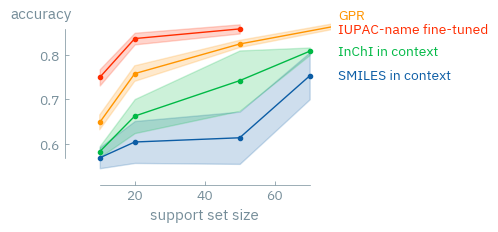

In [12]:
fig, ax = plt.subplots(figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot zero temperature SMILES and InChI

ax.plot(
    grouped.loc[(2, 'SMILES', 0)].index,
    grouped.loc[(2, 'SMILES', 0)]['accuracy']['mean'],
    label=f"SMILES in context",
    color=f"C0",
    marker='o',
)

ax.fill_between(
    grouped.loc[(2, 'SMILES', 0)].index,
    grouped.loc[(2, 'SMILES', 0)]['accuracy']['mean'] - grouped.loc[(2, 'SMILES', 0)]['accuracy']['sem'],
    grouped.loc[(2, 'SMILES', 0)]['accuracy']['mean'] + grouped.loc[(2, 'SMILES', 0)]['accuracy']['sem'],
    alpha=0.2,
    color=f"C0",
)

ax.plot(
    grouped.loc[(2, 'inchi', 0)].index,
    grouped.loc[(2, 'inchi', 0)]['accuracy']['mean'],
    label=f"InChI in context",
    color=f"C1",
    marker='o',
)

ax.fill_between(
    grouped.loc[(2, 'inchi', 0)].index,
    grouped.loc[(2, 'inchi', 0)]['accuracy']['mean'] - grouped.loc[(2, 'inchi', 0)]['accuracy']['sem'],
    grouped.loc[(2, 'inchi', 0)]['accuracy']['mean'] + grouped.loc[(2, 'inchi', 0)]['accuracy']['sem'],
    alpha=0.2,
    color=f"C1",
)

# plot GPR results

ax.plot(
    gpr_results.loc[2].index,
    gpr_results.loc[2]['accuracy']['mean'],
    label=f"GPR",
    color=f"C2",
    marker='o',
)

ax.fill_between(    
    gpr_results.loc[2].index,
    gpr_results.loc[2]['accuracy']['mean'] - gpr_results.loc[2]['accuracy']['sem'],
    gpr_results.loc[2]['accuracy']['mean'] + gpr_results.loc[2]['accuracy']['sem'],
    alpha=0.2,
    color=f"C2",
)



# plot GPT results

# ax.plot(
#     gpt_results.loc[2, 'SMILES'].index,
#     gpt_results.loc[2, 'SMILES']['accuracy']['mean'],
#     label=f"SMILES fine-tuned",
#     color=f"C3",
#     marker='o',
# )
# ax.fill_between(
#     gpt_results.loc[2, 'SMILES'].index,
#     gpt_results.loc[2, 'SMILES']['accuracy']['mean'] - gpt_results.loc[2, 'SMILES']['accuracy']['sem'],
#     gpt_results.loc[2, 'SMILES']['accuracy']['mean'] + gpt_results.loc[2, 'SMILES']['accuracy']['sem'],
#     alpha=0.2,
#     color=f"C3",
# )

ax.plot(
    gpt_results.loc[2, 'name'].index,
    gpt_results.loc[2, 'name']['accuracy']['mean'],
    label=f"IUPAC-name fine-tuned",
    color=f"C3",
    marker='o',
)
ax.fill_between(
    gpt_results.loc[2, 'name'].index,
    gpt_results.loc[2, 'name']['accuracy']['mean'] - gpt_results.loc[2, 'name']['accuracy']['sem'],
    gpt_results.loc[2, 'name']['accuracy']['mean'] + gpt_results.loc[2, 'name']['accuracy']['sem'],
    alpha=0.2,
    color=f"C3",
)



range_frame(
    ax,
    np.array([10, 70]),
    np.array([grouped.loc[(2, 'SMILES', 0)]['accuracy']['mean'].min(),  gpt_results.loc[2, 'name']['accuracy']['mean'].max()]),
)

ax.set_xlabel('support set size')

ylabel_top('accuracy', y_pad=0.12)

matplotx.line_labels(ax)

fig.savefig('acc_anthropic.pdf', bbox_inches='tight')

Text(0.5, 0.04, 'training set size')

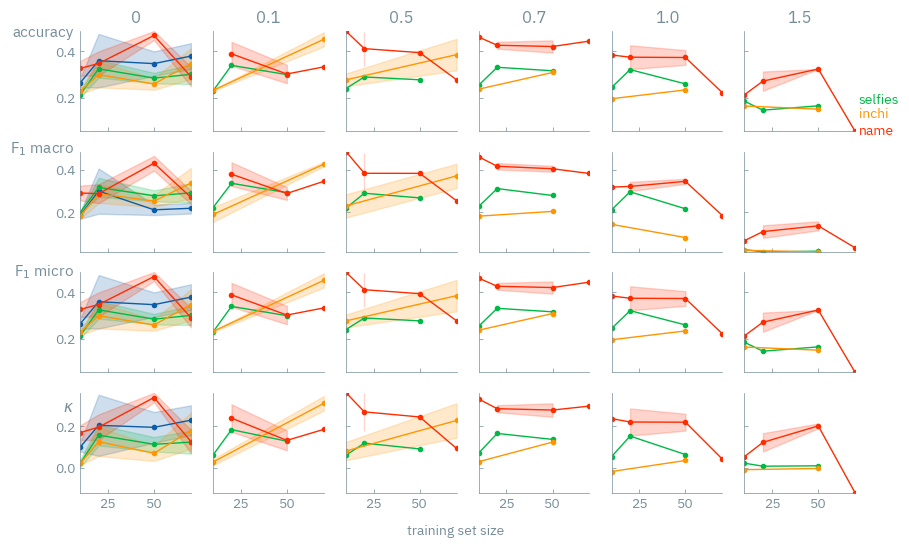

In [13]:
fig, ax = plt.subplots(4, 6, figsize=(10, 6), sharex=True, sharey='row')

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    for j, representation in enumerate(['SMILES', 'selfies', 'inchi', 'name']):
        for k, temperature in enumerate([0, 0.1, 0.5, 0.7, 1.0, 1.5]): 
            try:
                ax[i][k].plot(
                    grouped.loc[(5, representation, temperature)].index,
                    grouped.loc[(5, representation, temperature)][metric]['mean'],
                    label=f"{representation}",
                    color=f"C{j}",
                    marker='o',
                )

                ax[i][k].fill_between(
                    grouped.loc[(5, representation, temperature)].index,
                    grouped.loc[(5, representation, temperature)][metric]['mean'] - grouped.loc[(5, representation, temperature)][metric]['sem'],
                    grouped.loc[(5, representation, temperature)][metric]['mean'] + grouped.loc[(5, representation, temperature)][metric]['sem'],
                    alpha=0.2,
                    color=f"C{j}",
                )
            except KeyError:
                pass

for  k, temp in enumerate([0, 0.1, 0.5, 0.7, 1.0, 1.5]):
    ax[0][k].set_title(f"{temp}")

ylabel_top('accuracy', ax[0][0])
ylabel_top(r'F$_1$ macro', ax[1][0])
ylabel_top(r'F$_1$ micro', ax[2][0])
ylabel_top(r'$\kappa$', ax[3][0])

matplotx.line_labels(ax[0][-1])

fig.text(0.5, 0.04, 'training set size', ha='center')